# Data Augmentation
Data Augmentation occurs when you create new data based on the modification 
be images. Data augmentation on images would include transformations like:
 - Flipping the image either horizontally or vertically
 - Rotating the image
 - Zooming in or out of the image
 - Cropping the image
 - Varying the color of the image

### Question: Study the augmentation parameters for ImageDataGenerator (e.g., rotation range, channel shift range, etc.). Which parameters might be appropriate or inappropriate for banana leaf disease images? For example, if color is an important indicator for banana disease, should channel_shift_range be applied liberally, if at all?

- After reading on tensorflow documentation, I think zoom_range, width_shift_range and height_shift_range are appropriate since banana trees will not always be at the center of a camera or computer's view. The same could be said for horizontal_flip. Vertical_flip could also be used if let's say the camera is not supported by a gyroscope which may result in a misoriented camera view. Brightness_range might be used to simulate night and day, although I would personally choose not to adjust the color of the images since it might affect the color detection for diseases such black sigatoka. Other parameters that affects the color such as channel_shift_range should be avoided.

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [71]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [72]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
                        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10, horizontal_flip=True)

In [73]:
chosen_image = random.choice(os.listdir("/kaggle/input/cats-vs-dogs/train/dog"))

In [74]:
image_path = "/kaggle/input/cats-vs-dogs/train/dog/" + chosen_image

In [75]:
assert os.path.isfile(image_path)


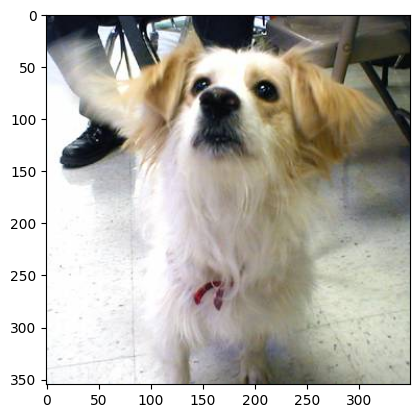

In [76]:
# Obtain image
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

In [77]:
# Generate batches of augmented images  from this image
aug_iter = gen.flow(image)

In [78]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(10)]

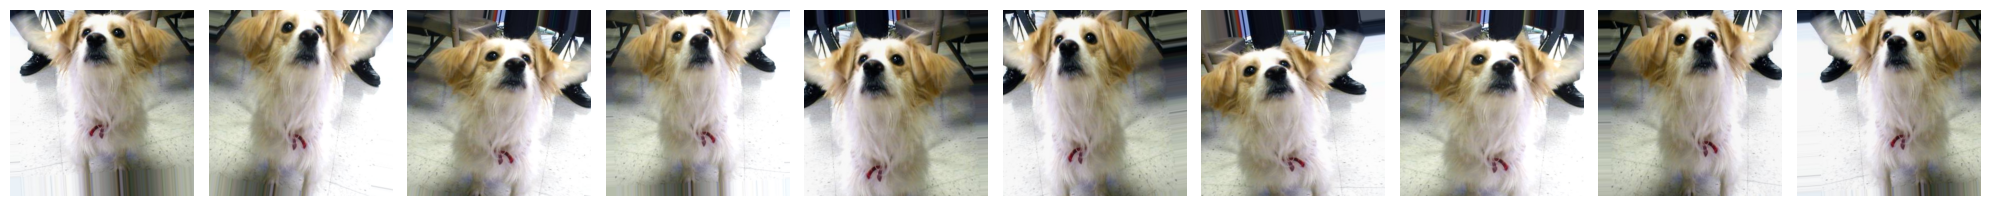

In [79]:
# Augmented images
plotImages(aug_images)